# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Fore, Back, Style
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
print(Fore.CYAN+Back.BLACK+str(df.head()))

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
num_row=df.shape[0]
print(Fore.CYAN+Back.BLACK+'The number of rows: '+str(num_row))

The number of rows: 294478


In [4]:
print(Fore.CYAN+Back.BLACK+'The number of rows in the dataset: ' + str(num_row))

The number of rows in the dataset: 294478


**c.** The number of unique users in the dataset.

In [5]:
unique_users=df['user_id'].nunique()
print(Fore.CYAN+Back.BLACK+'The number of unique users in the dataset: ' + str(unique_users)+ ' users')

The number of unique users in the dataset: 290584 users


**d.** The proportion of users converted.

In [6]:
prop_u_c=(df['converted'].mean())
percentage = f'{prop_u_c:.2%}'
print(Fore.CYAN+Back.BLACK+'The proportion of users converted : ' + str(percentage))

The proportion of users converted : 11.97%


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
df_n_t=len(df[(df['group']=='treatment') & 1-(df['landing_page']=='new_page')])
print(Fore.CYAN+Back.BLACK+'The number of times grour is treatment but "landing_page" is not a the new_page is : ' +str(df_n_t) + ' times')

The number of times grour is treatment but "landing_page" is not a the new_page is : 1965 times


In [8]:
df_n_c=len(df[(df['group']=='control') & 1-(df['landing_page']=='old_page')])
print(Fore.CYAN+Back.BLACK+'The number of times grour is control but "landing_page" is not a the new_page is : ' +str(df_n_c) + ' times')

The number of times grour is control but "landing_page" is not a the new_page is : 1928 times


**f.** Do any of the rows have missing values?

In [9]:
missing_values=df.isnull().sum()
print(Fore.CYAN+Back.BLACK+'the missing values for every row:')
print(str(missing_values)+Fore.CYAN+Back.BLACK)

the missing values for every row:
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


#### <a style="color:blue">* No missing values in any row.</a>

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df_c_n=df[((df['group'] == 'control') & 1-(df['landing_page'] == 'old_page'))]
df_t_o=df[((df['group'] == 'treatment') & 1-(df['landing_page'] == 'new_page'))]
dfz=df_c_n.append(df_t_o)

In [11]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2=pd.concat([df, dfz, dfz]).drop_duplicates(keep=False)

In [12]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
print(Fore.CYAN+Back.BLACK+str(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]))

0


### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [13]:
unique_users2=df2['user_id'].nunique()
print(Fore.CYAN+Back.BLACK+'The number of unique users in the dataset: ' + str(unique_users)+ ' users')

The number of unique users in the dataset: 290584 users


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [14]:
print(Fore.CYAN+Back.BLACK+'The user_id repeated: '+str(df2[df2["user_id"].duplicated(keep=False)]['user_id'].unique()))

The user_id repeated: [773192]


**c.** Display the rows for the duplicate **user_id**? 

In [15]:
print(Fore.CYAN+Back.BLACK+str(df2[df2['user_id']==773192]))

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [16]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(subset=['user_id', 'group','landing_page'], keep='first', inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
print(Fore.CYAN+Back.BLACK+str(df2[df2['user_id']==773192]))

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0


#### <p style="color:blue">*There is no duplicated entries any more, the past duplicated user_id have one entry.</p>

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [17]:
P_p=(df2['converted'].mean())
P_pop = f'{P_p:.4}'
print(Fore.CYAN+Back.BLACK+str('The probability of an individual converting regardless of the page :'+str(P_pop)))

The probability of an individual converting regardless of the page :0.1196


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df_c_c=len(df2[(df2['group']=='control') & (df2['converted']==1)])/len(df2[df2['group']=='control'])
print(Fore.CYAN+Back.BLACK+str('The probability of control group converted :' f'{df_c_c:.4}'))

The probability of control group converted :0.1204


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df_t_c=len(df2[(df2['group']=='treatment') & (df2['converted']==1)])/len(df2[df2['group']=='treatment'])
print(Fore.CYAN+Back.BLACK+str('The probability of treatment group converted :'f'{df_t_c:.4}'))

The probability of treatment group converted :0.1188


In [20]:
#Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=df_t_c- df_c_c
print(Fore.CYAN+Back.BLACK+str('obs_diff : 'f'{obs_diff:.2}'))

obs_diff : -0.0016


**d.** What is the probability that an individual received the new page?

In [21]:
received_n_p=len(df2[df2['landing_page']=='new_page'])/len(df2['landing_page'])
print(Fore.CYAN+Back.BLACK+str('The probability of receiving the new page: 'f'{received_n_p:.5}'))

The probability of receiving the new page: 0.50006


#### <p style="color:blue">*The probability of receiving both pages is approximately equal.

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

<p style="color:red">*The actual difference between the conversion rates for the two groups is so slight therefore, we cannot be certain which of the two groups is better, and it is clear that the difference is in favor of the control group.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

#### <p style="color:brown"> * Null hypothesis:
    
#### <p style="color:green">𝐻0:𝑃𝑛𝑒𝑤 − 𝑃𝑜𝑙𝑑 ≤ 0
 
#### <p style="color:brown"> * Alternative hypothesis: 
    
#### <p style="color:green">𝐻1:𝑃𝑛𝑒𝑤 − 𝑃𝑜𝑙𝑑 > 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
𝑝𝑛𝑒𝑤 = df2.converted.mean()
print(Fore.CYAN+Back.BLACK+str('𝑝𝑛𝑒𝑤: ')+str(f'{𝑝𝑛𝑒𝑤:.4}'))

𝑝𝑛𝑒𝑤: 0.1196


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
𝑝𝑜𝑙𝑑 = df2.converted.mean()
print(Fore.CYAN+Back.BLACK+str('𝑝𝑜𝑙𝑑: ')+str(f'{𝑝𝑜𝑙𝑑:.4}'))

𝑝𝑜𝑙𝑑: 0.1196


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [24]:
𝑛𝑛𝑒𝑤=len(df2[df2['landing_page']=='new_page'])
print(Fore.CYAN+Back.BLACK+str('𝑛𝑛𝑒𝑤: ' + str(𝑛new)))

𝑛𝑛𝑒𝑤: 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
𝑛𝑜𝑙𝑑=df2[df2['landing_page']=='old_page'].count()[0]
print(Fore.CYAN+Back.BLACK+str('𝑛𝑜𝑙𝑑: ' + str(𝑛𝑜𝑙𝑑)))

𝑛𝑜𝑙𝑑: 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [26]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size=𝑛𝑛𝑒𝑤, replace=True, p=(𝑝𝑛𝑒𝑤,1-𝑝𝑛𝑒𝑤))
print(Fore.CYAN+Back.BLACK+str("the mean of the new page converted: "+str(f'{new_page_converted.mean():.4}')))

the mean of the new page converted: 0.8804


**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [27]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size=𝑛𝑜𝑙𝑑, replace=True, p=(𝑝𝑜𝑙𝑑,1-𝑝𝑜𝑙𝑑))
print(Fore.CYAN+Back.BLACK+str("the mean of the old page converted: "+str(f'{old_page_converted.mean():.4}')))

the mean of the old page converted: 0.8803


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [28]:
diff_𝑝_𝑛𝑒𝑤_𝑝_𝑜𝑙𝑑=new_page_converted.mean()-old_page_converted.mean()
print(Fore.CYAN+Back.BLACK+str("the difference in the converted probability: "+str(f'{diff_𝑝_𝑛𝑒𝑤_𝑝_𝑜𝑙𝑑:.2}')))

the difference in the converted probability: 5.7e-05



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [29]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=𝑛𝑛𝑒𝑤, replace=True, p=(𝑝𝑛𝑒𝑤,1-𝑝𝑛𝑒𝑤))
    old_page_converted = np.random.choice([1,0], size=𝑛𝑜𝑙𝑑, replace=True, p=(𝑝𝑜𝑙𝑑,1-𝑝𝑜𝑙𝑑)) 
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

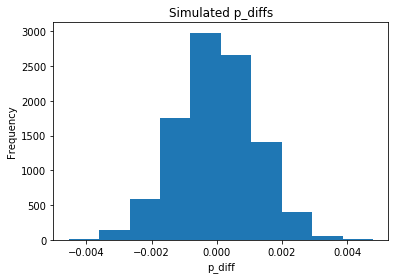

In [30]:
plt.hist(p_diffs);
plt.title('Simulated p_diffs')
plt.xlabel('p_diff')
plt.ylabel('Frequency');

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.

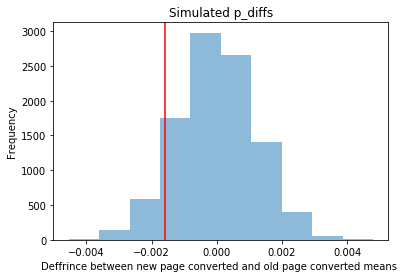

In [31]:
plt.hist(p_diffs, alpha = 0.5)
plt.xlabel('Deffrince between new page converted and old page converted means ')
plt.ylabel('Frequency')
plt.title('Simulated p_diffs')
plt.axvline(x=obs_diff,color='red');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [32]:
obs_diff = (df2[df2['group'] == "treatment"]['converted'].mean()) - (df2[df2['group'] == "control"]['converted'].mean())
print(Fore.CYAN+Back.BLACK+str('obs_diff: 'f'{obs_diff:.2}'))

obs_diff: -0.0016


In [33]:
p_diffs = np.array(p_diffs)
(p_diffs > obs_diff).mean()
print(Fore.CYAN+Back.BLACK+str('The proportion of the p_diffs are greater than the actual difference observed in the df2 data is: ' + str(f'{(p_diffs > obs_diff).mean():.3}')))

The proportion of the p_diffs are greater than the actual difference observed in the df2 data is: 0.906


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

<p style="color:red">* We just computed the actual difference versus observed difference in means of converted old page and converted new page.

<p style="color:red">* It called "p-value".

<p style="color:red">* "P-value" is exceeds the Type 1 error rate 0.05 in this case, so we fail to reject the null hypothesis, we cannot assume the new page converts more users than the old page.
There is no sufficient evidence to say that there is convertion difference between the new and old pages.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [34]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old =len(df2[(df2['landing_page'] == "old_page")&(df['converted']==1)])

# number of conversions with the new_page
convert_new =len(df2[(df2['landing_page'] == "new_page")&(df['converted']==1)])

# number of individuals who were shown the old_page
n_old = (df2[df2['landing_page'] == "old_page"].count())[0]

# number of individuals who received new_page
n_new = (df2[df2['landing_page'] == "new_page"].count())[0]

print(Fore.CYAN+Back.BLACK+str([convert_old,convert_new,n_old,n_new]))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[17489, 17264, 145274, 145310]


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

In [35]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print(Fore.CYAN+Back.BLACK+str(z_score))
print(Fore.CYAN+Back.BLACK+str(p_value))

-1.31092419842
0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

<p style="color:red">* The z-score measures the number of standard errors that the estimate falls from the null hypothesis.
    
<p style="color:red">* These values agree with the findings in parts j. and k.

<p style="color:red">* Again we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

#### <p style="color:blue">* A logistic Regression.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [36]:
df2['intercept']=1
df2[['control','ab_page']]=pd.get_dummies(df['group'])
df2=df2.drop(['control'],axis=1)
print(Fore.CYAN+Back.BLACK+str(df2.head()))

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1  
3          1        1  
4          1        0  


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [37]:
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results=logit_mod.fit()
print(Fore.CYAN+Back.BLACK+str(results.summary2()))

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-11 22:26 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


#### <p style="color:blue">* P-value is 0.1889 .The p-value for ab_page which refer to the new page here suggests that new page is not statistically significant that affects the conversion rate as 0.1889 > 0.05.
    
#### <p style="color:blue">* P-value is differ from the value I found in Part II,and this difference is due to that, the logistic Regression model is a two-sided test, while the computation done in Part II is a one-sided test, so our hyposises in case The logistic Regression will be as below: 
    
#### <p style="color:brown"> * Null hypothesis:
    
#### <p style="color:green">𝐻0:𝑃𝑛𝑒𝑤 = 𝑃𝑜𝑙𝑑
 
#### <p style="color:brown"> * Alternative hypothesis: 
    
#### <p style="color:green"> 𝐻1:𝑃𝑛𝑒𝑤 != 𝑃𝑜𝑙𝑑

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### <p style="color:blue"> *So far, there is no good reason to explain the transformation rate. An example of the elements that we can include for analysis is the age group that peruses each page and the extent to which this affects the transformation rate. Also, the geographical area in which each page is displayed can tell us something about the transformation rate.   
#### <p style="color:blue">* Adding other factors too much which are irrelevant will lead to misleading results.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [39]:
# Read the countries.csv
df3=pd.read_csv('countries.csv')
print(Fore.CYAN+Back.BLACK+str(df3.head()))

   user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK


In [40]:
# Join with the df2 dataframe
df_merged= pd.merge(df3, df2, on='user_id', how='inner')
print(Fore.CYAN+Back.BLACK+str(df_merged.head()))

   user_id country                   timestamp      group landing_page  \
0   834778      UK  2017-01-14 23:08:43.304998    control     old_page   
1   928468      US  2017-01-23 14:44:16.387854  treatment     new_page   
2   822059      UK  2017-01-16 14:04:14.719771  treatment     new_page   
3   711597      UK  2017-01-22 03:14:24.763511    control     old_page   
4   710616      UK  2017-01-16 13:14:44.000513  treatment     new_page   

   converted  intercept  ab_page  
0          0          1        0  
1          0          1        1  
2          1          1        1  
3          0          1        0  
4          0          1        1  


In [41]:
# Create the necessary dummy variables
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])
print(Fore.CYAN+Back.BLACK+str(df_merged.head()))

   user_id country                   timestamp      group landing_page  \
0   834778      UK  2017-01-14 23:08:43.304998    control     old_page   
1   928468      US  2017-01-23 14:44:16.387854  treatment     new_page   
2   822059      UK  2017-01-16 14:04:14.719771  treatment     new_page   
3   711597      UK  2017-01-22 03:14:24.763511    control     old_page   
4   710616      UK  2017-01-16 13:14:44.000513  treatment     new_page   

   converted  intercept  ab_page  CA  UK  US  
0          0          1        0   0   1   0  
1          0          1        1   0   0   1  
2          1          1        1   0   1   0  
3          0          1        0   0   1   0  
4          0          1        1   0   1   0  


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [42]:
# Fit your model, and summarize the results
logit_mod2=sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','CA','US']])
results3=logit_mod2.fit()
print(Fore.CYAN+Back.BLACK+str(results3.summary2()))

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-11 22:26 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0506    0.0284    -1.7835  0.074

#### <p style="color:blue"> *P-value for factors ab_page and country which recently added to our logistic regression is over "0.05" which means that no statistically significant for these factors affects on the conversion rate, so we still fail to reject the null hypothesis.

#### <p style="color:black"> * Now we will analyze the interaction between page and country if it have an effect on the convertion rate or not.

In [43]:
df_merged['CA_new'] = df_merged['CA'] * df_merged['ab_page']
df_merged['US_new'] = df_merged['US'] * df_merged['ab_page']

In [44]:
logit_mod3=sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','CA','US','CA_new', 'US_new']])
results4=logit_mod3.fit()
print(Fore.CYAN+Back.BLACK+str(results4.summary2()))

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-11 22:26 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA           -0.0118    0.0398    -0.2957  0.767

#### <p style="color:blue"> *Again P-value for all factors especially those that refer to interaction between page and country which recently added to our logistic regression is over "0.05" which means that no statistically significant for these factors affects on the conversion rate, so we still fail to reject the null hypothesis.

# <p style="color:Green">Conclusions
<p style="color:Green"> * First using Probability to Calculate the actual difference between the conversion rates for the two pages we found that there is no significant difference in conversion rates.
    
<p style="color:Green">* Second we use A/B Test through which we failed to reject the null hypothesis which states that the old page is better than the new page.

<p style="color:Green">* Finally, using the regression approach, our previous results were confirmed and there are no factors affecting conversion rates and that the use of the new page did not affect the increase in the conversion rate.

<p style="color:Green">* Therefore, we recommend that we should continue to use the current page.

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
print(Fore.CYAN+Back.BLACK+str(call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])))

0
